# Обработка результатов измерения при построении ударной адиабаты

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [80]:
up = [
      [1, 1.200],
      [2, 2.300],
      [3, 3.200],
      [4, 3.300],
      [5, 3.400],
      [6, 3.600],
      [7, 4.150], 
      [8, 4.500],
      [9, 4.750],
      [10, 4.750],
      [11, 5.100],
      [12, 5.500],
      [13, 5.500],
      [14, 5.600],
      [15, 5.650],
      [16, 5.900],
      [17, 6.100],
      [18, 6.150],
      [19, 6.100],
      [20, 6.150],
      [21, 6.250],
      [22, 6.450],
      [23, 6.500],
      [24, 6.600],
      [25, 6.750],
      [26, 6.900],
      [27, 6.900],
      [28, 7.100],
      [29, 7.200]
     ]
us = [
      [1, 1.900],
      [2, 2.950],
      [3, 4.050],
      [4, 4.400],
      [5, 4.200],
      [6, 4.800],
      [7, 6.100],
      [8, 6.500],
      [9, 6.100],
      [10, 6.450],
      [11, 7.100],
      [12, 6.750],
      [13, 7.500],
      [14, 7.850],
      [15, 8.750],
      [16, 7.600],
      [17, 7.550],
      [18, 7.850],
      [19, 8.300],
      [20, 8.950],
      [21, 8.250],
      [22, 8.300],
      [23, 8.300],
      [24, 9.100], 
      [25, 8.200],
      [26, 8.100],
      [27, 10.100],
      [28, 10.400],
      [29, 10.100]
     ]
for i in range(len(up)):
    up[i][1] *=1000
    us[i][1] *=1000

# Представим точки в виде таблицы

In [81]:
Up = pd.DataFrame(up, columns=[ 'id', 'Up'])
Us = pd.DataFrame(us, columns=[ 'id', 'Us'])
Up= Up.merge(Us, on='id')
del Up['id']

In [82]:
Up[:15].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Up,1200.0,2300.0,3200.0,3300.0,3400.0,3600.0,4150.0,4500.0,4750.0,4750.0,5100.0,5500.0,5500.0,5600.0,5650.0
Us,1900.0,2950.0,4050.0,4400.0,4200.0,4800.0,6100.0,6500.0,6100.0,6450.0,7100.0,6750.0,7500.0,7850.0,8750.0


In [83]:
Up[15:].T

,15,16,17,18,19,20,21,22,23,24,25,26,27,28
Up,5900.0,6100.0,6150.0,6100.0,6150.0,6250.0,6450.0,6500.0,6600.0,6750.0,6900.0,6900.0,7100.0,7200.0
Us,7600.0,7550.0,7850.0,8300.0,8950.0,8250.0,8300.0,8300.0,9100.0,8200.0,8100.0,10100.0,10400.0,10100.0


In [84]:
x = np.array(Up['Up'])#U
y = np.array(Up['Us']) #D
n = len(x)
wi = 1
ro = 0.123

# Вычисление коэффициента корреляции

# $Upsr = \frac{\sum{wi\cdot Up}}{wi} $
# $Ussr = \frac{\sum{wi\cdot Us}}{wi} $

In [85]:
Upsr = wi*sum(x) / n
Ussr = wi*sum(y) / n
print(' Upsr= ', Upsr, '\n', 'Ussr= ' , Ussr)

 Upsr=  5294.827586206897 
 Ussr=  7120.689655172414


# $Sw=\sum{wi\cdot(Upi-Upsr)^2}$
# $Sw1=\sum{wi\cdot(Usi-Ussr)^2}$
# $SP=\sum{wi(Upi-Upsr)(Usi-Ussr)}$
# Выборочный коэффициент корреляции:
# $r=\frac{SP}{\sqrt{Sw\cdot(Usi-Ussr)^2}}$

In [86]:
Sw = 0
for i in range (len(x)):
    a = (x[i]-Upsr)**2
    Sw += a
    
SP = 0
for i in range (len(x)):
    a = (x[i]-Upsr)*(y[i]-Ussr)
    SP += a
    
Sw1 = 0
for i in range (len(x)):
    a = (y[i]-Ussr)**2
    Sw1 += a

r = SP/ math.sqrt(Sw*Sw1)

print(' Sw= ', Sw, '\n', 'SP= ' , SP,  '\n','Sw1=', Sw1, '\n', 'r=', r)

 Sw=  66131724.13793105 
 SP=  88325603.44827586 
 Sw1= 126072586.20689654 
 r= 0.9673226558423361


# Оценка значимости коэффициента корреляции
# $ t = \frac{r\cdot \sqrt{n-2}}{\sqrt{1-r^2}}$

In [87]:
t = r*math.sqrt(n-2)/math.sqrt(1-r**2)
t

19.824035599317373

# t = 19.82 > t(n-2, P=0.95) = 2.05 
## А это означает, что нам не нужна выравнивающая замена переменных и можно переходить к описанию связи между X и Y линейной приближенной регрессией.

# Определение значений коэффициентов регресии.

# $ A1=\frac{SP}{Sw}$
# $ A0=Ussr-A1\cdot Upsr $
# Уравнение регрессии:
# $ Us1(Up)=A0+A1 \cdot Up $

In [88]:
A1 = SP/Sw
A0 = Ussr - A1*Upsr
print(' A1= ', A1, '\n', 'A0= ' , A0)

 A1=  1.3356010991646763 
 A0=  48.9121111470331


# Построим график

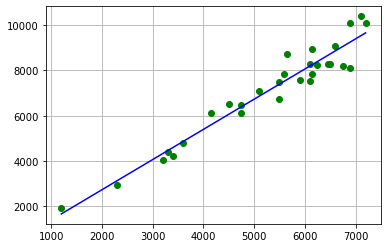

In [89]:
plt.plot(x, y, 'og')
plt.plot(x, A0+A1*x, 'b')
plt.grid()

# Выполним проверку. Для этого воспользуемся моделью линейной регрессии из библиотеки sklearn

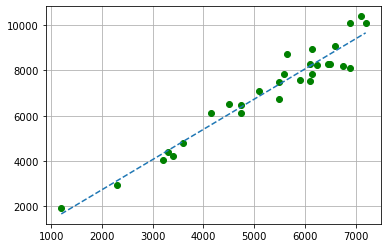

In [90]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = model.predict(x.reshape(-1, 1))
plt.plot(x, y, 'og')
plt.plot(x, y_pred, '--')
plt.grid()

# Оценка зависимости коэффициентов регресии

# $ di = Usi - A1 \cdot Upi - A0 $
# $ SA0=\sqrt{(\frac{Upsr^2}{Sw}+\frac{1}{\sum{wi}})\cdot(\frac{\sum{wi\cdot di^2}}{n-2})} $
# $ SA1=\sqrt{(\frac{1}{Sw})\cdot(\frac{\sum{wi\cdot di^2}}{n-2})} $

In [91]:
di = []
for i in range (len(y)):
    a = y[i]-A1*x[i]-A0
    di.append(a)
    
di2 = 0
for i in range (len(y)):
    di2 += di[i]**2

SA0 = math.sqrt((((Upsr**2)/Sw) + 1/n)*(di2/(n-2)))
SA1 = math.sqrt((1/Sw)*(di2/(n-2)))
print(' SA0=', SA0, '\n', 'SA1=' , SA1)

 SA0= 370.9520774675889 
 SA1= 0.06737281581610276


# $ t=\frac{A0}{SA0}=19.82\:\:\:\:  19.82>2.05 $
# $ t=\frac{A1}{SA1}=0.13\:\:\:\:  0.13<2.05 $

## Из данных соотношений можем сделать вывод, что коэффициент А0 имеет высокую статистическую значимость, а A1 - нет (это логично, так как угол наклона графика линейной регрессии близок к 45 градусам.)

# Проверка гипотезы о том, что регрессия подсказывает зависимость точнее, чем среднее.

# $ \frac{Sus^2}{Susust^2}=\frac{\sum{(Usi-Ussr)^2 \cdot wi}}{\sum{di^2 \cdot wi}} \cdot \frac{n-2}{n-1}= 14.99$
# $ F(n-1, n-2, P=0.95)=2.1<14.99$
## А это означает, что по критерию Фишера регрессия дает большую точность, чем среднее значение, в 2.1 раза.

In [92]:
((n-2)*Sw1)/((n-1)*di2)

14.999728122964433

# Нахождение границ доверительной области регресии

# $Syregr(Up) = \sqrt{\frac{1}{n-2} \cdot \frac{\sum wi \cdot di^2}{\sum{wi}} \cdot [\frac{1+(Upsr-Up)^2}{\frac{Sw}{\sum Wi}}]} $
# $ yregr1(Up) = Us1(Up) + Syregr(Up) \cdot t $
# $ yregr2(Up) = Us2(Up) - Syregr(Up) \cdot t $

In [93]:
t = 2.05

In [94]:
def Us1(Up):
    return A0+A1*Up

In [95]:
def Syregr(x1):
    return ((1/(n-2))*(di2/n)*((1+(Upsr-x1)**2)/(Sw/n)))**0.5

In [96]:
def Yregr1(x1):
    return Us1(x1) + Syregr(x1)*t

In [97]:
def Yregr2(x1):
    return Us1(x1) - Syregr(x1)*t

# Нахождение границ для облака точек
# $Sy(Up) = \sqrt{Syregr(Up)^2+\frac{\sum wi \cdot di^2}{n-2}} $
# $ y1(Up) = Usi(Up) + Sy(Up) \cdot t $
# $ y2(Up) = Usi(Up) - Sy(Up) \cdot t $

In [98]:
def Sy(x1):
    return ((Syregr(x1)**2)+di2/n-2)**0.5

In [99]:
def y1(x1):
    return Us1(x1) + Sy(x1)*t

In [100]:
def y2(x1):
    return Us1(x1) - Sy(x1)*t

In [101]:
x = x.astype(float)

# Построим график

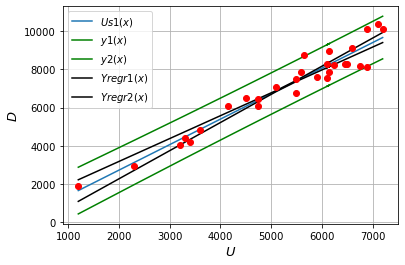

In [102]:
plt.plot(x, Us1(x), label = '$Us1(x)$')
plt.plot(x, y1(x), label = '$y1(x)$', color = 'green')
plt.plot(x, y2(x), label = '$y2(x)$', color = 'green')
plt.plot(x, Yregr1(x), label = '$Yregr1(x)$', color = 'black')
plt.plot(x, Yregr2(x), label = '$Yregr2(x)$', color = 'black')
plt.plot(x, y, 'or')
plt.grid()
plt.legend()
plt.xlabel('$U$', size = 13)
plt.ylabel('$D$', size = 13)
plt.savefig('graph1.png')

# Перестроение ударной адиабаты в $p - \rho $ координаты

In [103]:
def pi(x):
    return ro*x*(A0+A1*x)

In [104]:
def roi(x):
    return ro*(A0+A1*x)/(A0+(A1-1)*x)

In [105]:
pi = []

x = np.array(Up['Up'])

for i in range(len(x)):
    pi.append( ro*x[i]*(A0+A1*x[i]))
    
roi = []

for i in range(len(x)):
    roi.append( ro*(A0+A1*x[i])/(A0+(A1-1)*x)[i])

In [106]:
psr = ro*Upsr*(A0+A1*Upsr)
rosr = ro * (A0+A1*Upsr)/(A0+(A1-1)*Upsr)
print (' psr= ', psr, '\n', "rosr= ", rosr)

 psr=  4637447.354340072 
 rosr=  0.4796883852691217


In [115]:
t = 2.05
sigy = 0.05*Upsr
S1A0 = math.sqrt((SA0**2)*(t**2))
S1A1 = math.sqrt((SA1**2)*(t**2))

In [116]:
dp = math.sqrt(((ro*A0+2*ro*A1*Upsr)**2)*4*(sigy**2)+((ro*Upsr*S1A0)**2)+((ro*Upsr*Upsr*S1A1)**2))
dp

1151712.6565995014

In [117]:
a = (((ro*A1/(A0+(A1-1*Upsr))) - ro*(A1-1)*(A0+A1*Upsr)/((A0+(A1-1*Upsr))**2))**2)*4*sigy*sigy
b = (((ro/(A0+(A1-1*Upsr))) - ro*(A0+A1*Upsr)/((A0+(A1-1*Upsr))**2))**2)*S1A0*S1A0
c = ((((ro*Upsr)/(A0+(A1-1*Upsr))) - ro*Upsr*(((A0+A1*Upsr)/((A0+(A1-1*Upsr))**2))**2))**2)*S1A1*S1A1
dro = math.sqrt(a+b+c)

In [118]:
dro = math.sqrt(a+b+c)/30

# Построим график

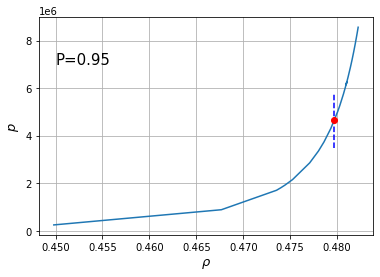

In [119]:
plt.plot(roi, pi)
plt.xlabel(r'$\rho$', size = 13)
plt.ylabel('$p$', size = 13)
plt.plot(rosr, psr, 'or')
plt.vlines(rosr, psr-dp, psr+dp, color='b', linestyles={'dashed'})
#plt.hlines(psr, rosr-dro, rosr+dro, color='b', linestyles={'dashed'})
plt.text(0.45, 7000000, 'P=0.95', size = 15)
plt.grid()